In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

In [2]:
nex = pd.read_csv('./Data/NEX_subset_prices.csv', index_col=0)
companies = pd.read_csv('./Data/NEX_companies.csv', index_col=0)

countries = ['China', 'Germany', 'India', 'United States']

companies = companies.replace(['CHINA', 'GERMANY', 'INDIA', 'US'], countries)
companies.sample(5)

,company name,description,sec.,cur.,country,symbol
25,Sunnova,Residential solar and energy storage installat...,RSR,USD,United States,NOVA
17,Nio,"EVs, design, manufacture, and sale including SUVs",ENS,USD,China,NIO
1,Arcosa,"Wind Towers, structures for electricity transm...",RWD,USD,United States,ACA
32,Willdan Group,"Energy efficiency in infrastructure, engineering.",EEF,USD,United States,WLDN
9,Enphase,"Inverters, micro-products for solar panels, st...",RSR,USD,United States,ENPH


In [3]:
def weight(df):
    C = df.shape[1]
    W = (df > 0).astype(int).sum(axis=1) / C

    df = (df.T * W).T.sum(axis=1)
    
    return df

def returns(df):
    idx = pd.date_range('31-12-2000', '31-12-2019', freq='Y')

    df.index = pd.to_datetime(df.index)
    df = df[df > 0]
    df = df.resample('Y').ffill().pct_change() * 100
    
    df = df.reindex(idx, fill_value=0).fillna(0)
    
    return df

In [4]:
df = pd.DataFrame(columns=['Country', 'Year', 'NEX Returns'])

df['Country'] = countries * 20
df['Year'] = np.arange(2000, 2020).repeat(4)

df = df.sort_values(by=['Country', 'Year']).reset_index(drop=True)

df.head()

,Country,Year,NEX Returns
0,China,2000,NaN
1,China,2001,NaN
2,China,2002,NaN
3,China,2003,NaN
4,China,2004,NaN


In [5]:
for i, country in enumerate(countries):
    nex_C = nex.loc[:,companies[companies['country'] == country]['symbol'].values]
    
    R = returns(weight(nex_C))
    
    s = i * 20
    e = (i + 1) * 20
    e = e - 1
    
    df.loc[s:e, 'NEX Returns'] = R.values

In [6]:
df['NEX Returns'] = df['NEX Returns'].astype(np.float)

<AxesSubplot:xlabel='Year', ylabel='NEX Returns'>

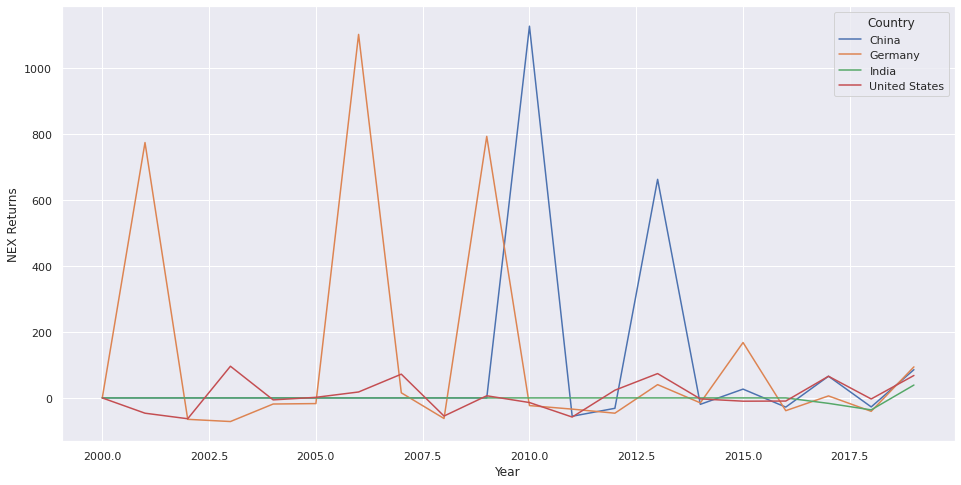

In [7]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='Year', y='NEX Returns', hue='Country')

In [8]:
df.to_csv('./Data Formated/NEX_returns.csv')